In [4]:
!pip install tensorflow tensorflow_hub


In [3]:
from google.colab import files

# This will prompt you to upload the zip file from your local machine
uploaded = files.upload()


Saving Dataset Brain Tumor.zip to Dataset Brain Tumor (1).zip


In [10]:
import zipfile
import os

# Specify the name of the uploaded zip file
zip_file_name = 'Dataset Brain Tumor.zip'  # Change this if your zip file name is different

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('Dataset Brain Tumor')

# Verify the contents of the unzipped directory
os.listdir('Dataset Brain Tumor')

['Dataset Brain Tumor']

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


# Load training data with augmentation
train_generator = datagen.flow_from_directory(
    '/content/Dataset Brain Tumor/Dataset Brain Tumor/Training Dataset',
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical'
)

# Load testing data without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/Dataset Brain Tumor/Dataset Brain Tumor/Testing Dataset',
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical'
)


Found 5708 images belonging to 4 classes.
Found 1273 images belonging to 4 classes.


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Reduced range
    width_shift_range=0.2,  # Reduced range
    height_shift_range=0.2,  # Reduced range
    shear_range=0.2,  # Reduced range
    zoom_range=0.2,  # Reduced range
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training data with augmentation
train_generator = datagen.flow_from_directory(
    '/content/Dataset Brain Tumor/Dataset Brain Tumor/Training Dataset',
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical'
)

# Load testing data without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/Dataset Brain Tumor/Dataset Brain Tumor/Testing Dataset',
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical'
)

# Load the base model
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(240, 240, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)  # Added L2 regularization
x = Dropout(0.5)(x)  # Apply dropout
x = Dense(4, activation='softmax')(x)  # Output layer for 4 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Step 3: Evaluate the best model

# Load the best model based on validation accuracy
best_model = load_model('best_model.h5')

# Evaluate the performance of the best model on the test dataset
evaluation = best_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")


Found 5708 images belonging to 4 classes.
Found 1273 images belonging to 4 classes.
Epoch 1/30
179/179 [==============================] - ETA: 0s - loss: 1.6980 - accuracy: 0.8367

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


179/179 [==============================] - 217s 844ms/step - loss: 1.6980 - accuracy: 0.8367 - val_loss: 2.6975 - val_accuracy: 0.3181 - lr: 1.0000e-04
Epoch 2/30
179/179 [==============================] - 146s 812ms/step - loss: 1.3018 - accuracy: 0.9445 - val_loss: 2.4951 - val_accuracy: 0.3181 - lr: 1.0000e-04
Epoch 3/30
179/179 [==============================] - 148s 823ms/step - loss: 1.1099 - accuracy: 0.9650 - val_loss: 1.5460 - val_accuracy: 0.7502 - lr: 1.0000e-04
Epoch 4/30
179/179 [==============================] - 146s 811ms/step - loss: 0.9592 - accuracy: 0.9769 - val_loss: 2.6085 - val_accuracy: 0.4619 - lr: 1.0000e-04
Epoch 5/30
179/179 [==============================] - 149s 830ms/step - loss: 0.8246 - accuracy: 0.9807 - val_loss: 4.5175 - val_accuracy: 0.3221 - lr: 1.0000e-04
Epoch 6/30
179/179 [==============================] - 151s 842ms/step - loss: 0.7133 - accuracy: 0.9811 - val_loss: 0.8404 - val_accuracy: 0.9293 - lr: 1.0000e-04
Epoch 7/30
179/179 [=============

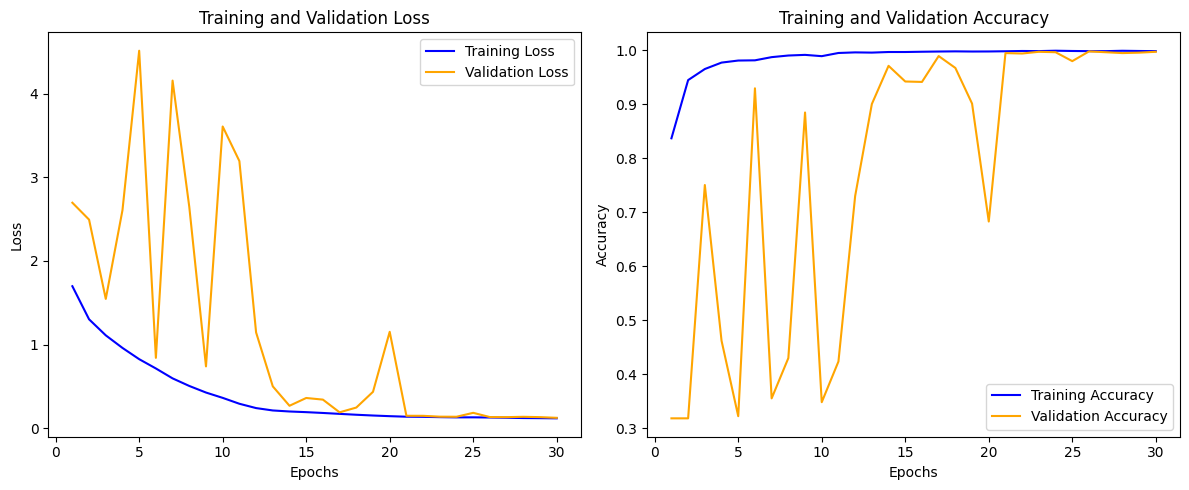

In [1]:
import matplotlib.pyplot as plt

# Data from the training log
epochs = list(range(1, 31))
train_loss = [1.6980, 1.3018, 1.1099, 0.9592, 0.8246, 0.7133, 0.5947, 0.5039, 0.4251, 0.3613, 0.2908, 0.2390, 0.2105, 0.1983, 0.1903, 0.1806, 0.1697, 0.1592, 0.1500, 0.1422, 0.1357, 0.1342, 0.1304, 0.1277, 0.1283, 0.1261, 0.1235, 0.1198, 0.1183, 0.1162]
train_accuracy = [0.8367, 0.9445, 0.9650, 0.9769, 0.9807, 0.9811, 0.9870, 0.9900, 0.9912, 0.9888, 0.9947, 0.9958, 0.9954, 0.9965, 0.9965, 0.9970, 0.9974, 0.9977, 0.9974, 0.9975, 0.9979, 0.9984, 0.9982, 0.9989, 0.9984, 0.9981, 0.9981, 0.9988, 0.9984, 0.9981]
val_loss = [2.6975, 2.4951, 1.5460, 2.6085, 4.5175, 0.8404, 4.1597, 2.6479, 0.7380, 3.6102, 3.1961, 1.1449, 0.4991, 0.2667, 0.3599, 0.3404, 0.1882, 0.2454, 0.4338, 1.1522, 0.1469, 0.1464, 0.1362, 0.1352, 0.1822, 0.1313, 0.1306, 0.1346, 0.1306, 0.1225]
val_accuracy = [0.3181, 0.3181, 0.7502, 0.4619, 0.3221, 0.9293, 0.3551, 0.4297, 0.8845, 0.3480, 0.4234, 0.7298, 0.9002, 0.9709, 0.9419, 0.9411, 0.9890, 0.9670, 0.9010, 0.6826, 0.9945, 0.9937, 0.9969, 0.9961, 0.9796, 0.9976, 0.9961, 0.9945, 0.9953, 0.9969]

# Plotting Training and Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for test data
y_pred = best_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the index of the highest probability class

# Get the true labels
y_true = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Optionally, print classification report
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


NameError: name 'best_model' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)

# Load training data with augmentation
train_generator = datagen.flow_from_directory(
    '/content/Dataset Brain Tumor/Dataset Brain Tumor/Training Dataset',
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical'
)

# Load testing data without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/Dataset Brain Tumor/Dataset Brain Tumor/Testing Dataset',
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for generating accurate predictions
)

# Load the base model
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(240, 240, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)  # L2 regularization
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)  # Output layer for 4 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Step 3: Evaluate the best model
best_model = load_model('best_model.h5')

# Evaluate the performance of the best model on the test dataset
evaluation = best_model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")

# Generate predictions
y_pred = best_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class indices
y_true = test_generator.classes  # True class labels

# Classification Report
target_names = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred_classes, target_names=target_names)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(4):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {target_names[i]} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve for each class
plt.figure(figsize=(10, 8))
for i in range(4):
    precision, recall, _ = precision_recall_curve(y_true == i, y_pred[:, i])
    plt.plot(recall, precision, label=f'Class {target_names[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Class-wise Accuracy Bar Plot
accuracy_per_class = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(8, 6))
plt.bar(target_names, accuracy_per_class)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.show()

# Learning Rate vs Loss (Learning Rate Scheduler)
learning_rates = [0.0001 * (0.2 ** (i // 3)) for i in range(len(history.history['loss']))]
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, history.history['loss'], marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.xscale('log')
plt.title('Learning Rate vs Loss')
plt.show()

# Model Complexity vs Accuracy (Optional, depending on model complexity tracking)
plt.figure(figsize=(10, 6))
complexity = range(1, len(history.history['accuracy']) + 1)
plt.plot(complexity, history.history['accuracy'], label='Training Accuracy')
plt.plot(complexity, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Model Complexity (Epochs)')
plt.ylabel('Accuracy')
plt.title('Model Complexity vs Accuracy')
plt.legend()
plt.show()
